In [ ]:
%matplotlib notebook

In [1]:
#Dependencies 
import numpy as np
import pandas as pd
import requests
import time
import json
from us import states
from scipy.stats import linregress
from matplotlib import pyplot as plt
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
# Import CSVs
flight_data2016 = pd.read_csv("../project_data/airline_data/TFMSC_Report_2016.csv")
flight_data2017 = pd.read_csv("../project_data/airline_data/TFMSC_Report_2017.csv")
flight_data2018 = pd.read_csv("../project_data/airline_data/TFMSC_Report_2018.csv")
flight_data2019 = pd.read_csv("../project_data/airline_data/TFMSC_Report_2019.csv")
flight_data2020 = pd.read_csv("../project_data/airline_data/TFMSC_Report_2020.csv")

In [3]:
combined_df = pd.concat([flight_data2016, flight_data2017, flight_data2018, flight_data2019, flight_data2020])
combined_df.head()

,Date,Airport,Flight Type,Departures,Departure Seats
0,1/1/2016,ATL - Atlanta,US to Foreign,9,"2,975"
1,1/1/2016,ATL - Atlanta,US to Foreign,1,550
2,1/1/2016,ATL - Atlanta,US to Foreign,1,0
3,1/1/2016,ATL - Atlanta,US to Foreign,7,"1,610"
4,1/1/2016,ATL - Atlanta,US to Foreign,5,"1,225"


In [4]:
atl = combined_df.loc[combined_df["Airport"] == "ATL - Atlanta"]

In [5]:
dallas = combined_df.loc[combined_df["Airport"] == 'DFW - Dallas/Ft. Worth']

In [6]:
new_york = combined_df.loc[combined_df["Airport"] == 'JFK - New York']

In [7]:
lax = combined_df.loc[combined_df["Airport"] == 'LAX - Los Angeles']

In [8]:
chicago = combined_df.loc[combined_df["Airport"] == 'ORD - Chicago']

In [9]:
domestic = combined_df.loc[combined_df["Flight Type"] == "Domestic"]
domestic

,Date,Airport,Flight Type,Departures,Departure Seats
17,1/1/2016,ATL - Atlanta,Domestic,1,335
18,1/1/2016,ATL - Atlanta,Domestic,2,960
19,1/1/2016,ATL - Atlanta,Domestic,1,0
20,1/1/2016,ATL - Atlanta,Domestic,8,"1,840"
21,1/1/2016,ATL - Atlanta,Domestic,1,245
...,...,...,...,...,...
37359,7/1/2020,DFW - Dallas/Ft. Worth,Domestic,0,0
37360,7/1/2020,JFK - New York,Domestic,0,0
37361,7/1/2020,JFK - New York,Domestic,0,0
37362,7/1/2020,ORD - Chicago,Domestic,0,0


In [10]:
domestic['year'] = pd.DatetimeIndex(domestic['Date']).year
domestic

/Users/danielpetrella/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Airport,Flight Type,Departures,Departure Seats,year
17,1/1/2016,ATL - Atlanta,Domestic,1,335,2016
18,1/1/2016,ATL - Atlanta,Domestic,2,960,2016
19,1/1/2016,ATL - Atlanta,Domestic,1,0,2016
20,1/1/2016,ATL - Atlanta,Domestic,8,"1,840",2016
21,1/1/2016,ATL - Atlanta,Domestic,1,245,2016
...,...,...,...,...,...,...
37359,7/1/2020,DFW - Dallas/Ft. Worth,Domestic,0,0,2020
37360,7/1/2020,JFK - New York,Domestic,0,0,2020
37361,7/1/2020,JFK - New York,Domestic,0,0,2020
37362,7/1/2020,ORD - Chicago,Domestic,0,0,2020


In [15]:
chicago_domestic = domestic.loc[domestic["Airport"] == 'ORD - Chicago']
chicago_domestic.head()

,Date,Airport,Flight Type,Departures,Departure Seats,year
202,1/1/2016,ORD - Chicago,Domestic,10,"4,736",2016
203,1/1/2016,ORD - Chicago,Domestic,2,0,2016
204,1/1/2016,ORD - Chicago,Domestic,7,"1,610",2016
205,1/1/2016,ORD - Chicago,Domestic,3,915,2016
206,1/1/2016,ORD - Chicago,Domestic,1,270,2016


In [16]:
chi_dates = chicago_domestic.groupby('year').count()["Departures"]
chi_dates = chi_dates.reset_index()
chi_dates

,year,Departures
0,2016,10659
1,2017,10360
2,2018,10257
3,2019,10233
4,2020,5007


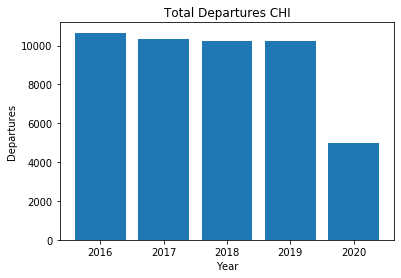

In [17]:
#Chicago Graph
plt.bar(chi_dates['year'], chi_dates['Departures'])
plt.title("Total Departures CHI")
plt.xlabel('Year')
plt.ylabel('Departures')
plt.savefig('../graphs/Fig2.png')
plt.show()

In [18]:
atl_domestic = domestic.loc[domestic["Airport"] == 'ATL - Atlanta']
atl_domestic.head()

,Date,Airport,Flight Type,Departures,Departure Seats,year
17,1/1/2016,ATL - Atlanta,Domestic,1,335,2016
18,1/1/2016,ATL - Atlanta,Domestic,2,960,2016
19,1/1/2016,ATL - Atlanta,Domestic,1,0,2016
20,1/1/2016,ATL - Atlanta,Domestic,8,"1,840",2016
21,1/1/2016,ATL - Atlanta,Domestic,1,245,2016


In [19]:
atl_dates = atl_domestic.groupby('year').count()["Departures"]
atl_dates = atl_dates.reset_index()
atl_dates

,year,Departures
0,2016,9667
1,2017,9789
2,2018,9844
3,2019,9462
4,2020,4290


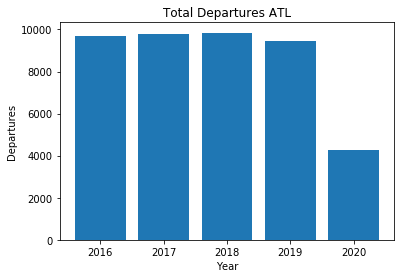

In [20]:
#Atlanta Graph
plt.bar(atl_dates['year'], atl_dates['Departures'])
plt.title("Total Departures ATL")
plt.xlabel('Year')
plt.ylabel('Departures')
plt.savefig('../graphs/Fig3.png')
plt.show()

In [21]:
dal_domestic = domestic.loc[domestic["Airport"] == 'DFW - Dallas/Ft. Worth']
dal_domestic.head()

,Date,Airport,Flight Type,Departures,Departure Seats,year
60,1/1/2016,DFW - Dallas/Ft. Worth,Domestic,3,"1,440",2016
61,1/1/2016,DFW - Dallas/Ft. Worth,Domestic,1,0,2016
62,1/1/2016,DFW - Dallas/Ft. Worth,Domestic,11,"2,530",2016
63,1/1/2016,DFW - Dallas/Ft. Worth,Domestic,3,915,2016
64,1/1/2016,DFW - Dallas/Ft. Worth,Domestic,2,270,2016


In [22]:
dal_dates = dal_domestic.groupby('year').count()["Departures"]
dal_dates = dal_dates.reset_index()
dal_dates

,year,Departures
0,2016,9076
1,2017,9807
2,2018,10193
3,2019,9398
4,2020,4112


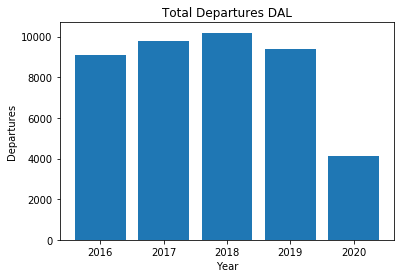

In [23]:
#Dallas/Ft. Worth Graph
plt.bar(dal_dates['year'], dal_dates['Departures'])
plt.title("Total Departures DAL")
plt.xlabel('Year')
plt.ylabel('Departures')
plt.savefig('../graphs/Fig4.png')
plt.show()

In [24]:
ny_domestic = domestic.loc[domestic["Airport"] == 'JFK - New York']
ny_domestic.head()

,Date,Airport,Flight Type,Departures,Departure Seats,year
113,1/1/2016,JFK - New York,Domestic,1,253,2016
114,1/1/2016,JFK - New York,Domestic,3,"1,440",2016
115,1/1/2016,JFK - New York,Domestic,8,"1,840",2016
116,1/1/2016,JFK - New York,Domestic,1,270,2016
117,1/1/2016,JFK - New York,Domestic,1,0,2016


In [25]:
ny_dates = ny_domestic.groupby('year').count()["Departures"]
ny_dates = ny_dates.reset_index()
ny_dates

,year,Departures
0,2016,7826
1,2017,7615
2,2018,7335
3,2019,8506
4,2020,3439


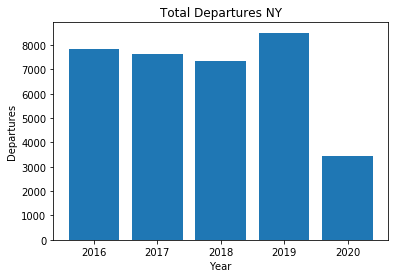

In [26]:
#New York Graph
plt.bar(ny_dates['year'], ny_dates['Departures'])
plt.title("Total Departures NY")
plt.xlabel('Year')
plt.ylabel('Departures')
plt.savefig('../graphs/Fig5.png')
plt.show()

In [27]:
lax_domestic = domestic.loc[domestic["Airport"] == 'LAX - Los Angeles']
lax_domestic.head()

,Date,Airport,Flight Type,Departures,Departure Seats,year
155,1/1/2016,LAX - Los Angeles,Domestic,5,"1,265",2016
156,1/1/2016,LAX - Los Angeles,Domestic,1,335,2016
157,1/1/2016,LAX - Los Angeles,Domestic,1,0,2016
158,1/1/2016,LAX - Los Angeles,Domestic,2,960,2016
159,1/1/2016,LAX - Los Angeles,Domestic,2,0,2016


In [28]:
lax_dates = lax_domestic.groupby('year').count()["Departures"]
lax_dates = lax_dates.reset_index()
lax_dates

,year,Departures
0,2016,10059
1,2017,9660
2,2018,9093
3,2019,9430
4,2020,4311


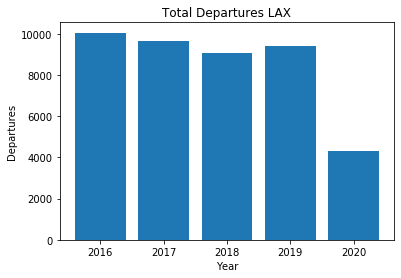

In [29]:
#LAX Graph LAX - Los Angeles
plt.bar(lax_dates['year'], lax_dates['Departures'])
plt.title("Total Departures LAX")
plt.xlabel('Year')
plt.ylabel('Departures')
plt.savefig('../graphs/Fig6.png')
plt.show()